In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import nltk
from pathlib import Path

In [13]:
#each data set has 2000 observations for each day using the search query of "coronavirus"
tweets30 = pd.read_csv("first.csv",encoding = "ISO-8859-1")
tweets29 = pd.read_csv("second.csv", encoding = "ISO-8859-1")
tweets28 = pd.read_csv("third.csv", encoding = "ISO-8859-1")
tweets27 = pd.read_csv("fourth.csv", encoding = "ISO-8859-1")
tweets26 = pd.read_csv("fifth.csv", encoding = "ISO-8859-1")
tweets25 = pd.read_csv("sixth.csv", encoding = "ISO-8859-1")
tweets24 = pd.read_csv("seventh.csv", encoding = "ISO-8859-1")
tweets23 = pd.read_csv("eighth.csv", encoding = "ISO-8859-1")

In [14]:
tweets = pd.concat((tweets23,tweets24,tweets25,tweets26,tweets27,tweets28,tweets29,tweets30), ignore_index = True)
tweets

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,4/23/20 23:59,workstream_us,NaN,0,0,0,With the scarcity of #foodservice jobs availab...,NaN,NaN,#foodservice #grocery #healthcare #Workstream ...,1.253470e+18,https://twitter.com/workstream_us/status/12534...
1,4/23/20 23:59,GoReactforASL,NaN,0,0,2,#Deaf Interpreter Rupert Dubler On His Role Du...,NaN,NaN,#Deaf,1.253470e+18,https://twitter.com/GoReactforASL/status/12534...
2,4/23/20 23:59,hgilmore1982,NaN,0,0,0,"If the coronavirus response team were a band, ...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/hgilmore1982/status/125347...
3,4/23/20 23:59,dbcurren,NaN,0,0,1,ÛÏThe crisis demanded a response that was swi...,NaN,NaN,#Coronavirus #America,1.253470e+18,https://twitter.com/dbcurren/status/1253473726...
4,4/23/20 23:59,LegendOfBuku,NaN,1,0,13,The coronavirus has really slowed down my cash...,NaN,NaN,NaN,1.253470e+18,https://twitter.com/LegendOfBuku/status/125347...
5,4/23/20 23:59,_hkfxp,NaN,0,0,1,"eae coronavirus, como vou usar mÌÁscara nessa ...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/_hkfxp/status/125347372625...
6,4/23/20 23:59,RhenryHumphries,NaN,1,0,0,"So, Trump is confusing the Coronavirus with va...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/RhenryHumphries/status/125...
7,4/23/20 23:59,stephenr262,NaN,0,0,0,First known U.S. coronavirus death was in the ...,NaN,NaN,NaN,1.253470e+18,https://twitter.com/stephenr262/status/1253473...
8,4/23/20 23:59,__s4d3yes__,Carfu19,1,0,0,coronavirus,NaN,NaN,NaN,1.253470e+18,https://twitter.com/__s4d3yes__/status/1253473...
9,4/23/20 23:59,CrazyByNature2,NaN,0,0,0,#coronavirus,NaN,NaN,#coronavirus,1.253470e+18,https://twitter.com/CrazyByNature2/status/1253...


In [15]:
#download vader lexicon for polarity measurement
sent = pd.read_table("vader_lexicon.txt", header = None).set_index(0).drop([2,3], axis = 1).rename(index = str, columns = {1:'polarity'}).rename_axis('word')
sent.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [16]:
tweets['text'] = tweets['text'].str.lower()

In [18]:
#get rid of punctuation 
punct_re = "[^\w\s]"
tweets['no_punc'] = tweets['text'].str.lower().str.replace(punct_re, ' ')

In [19]:
ded = tweets['no_punc'].str.split(expand = True).stack().reset_index(level = 1)
tidy_format = ded.rename(columns = {'level_1': 'num', 0: 'word'})

,num,word
0,0,with
0,1,the
0,2,scarcity
0,3,of
0,4,foodservice
0,5,jobs
0,6,available
0,7,other
0,8,industries
0,9,such


In [20]:
joiner = tidy_format.reset_index().merge(sent, left_on = "word", right_on = 'word', how = 'left')
modifier = joiner.fillna(0).groupby('index').sum().drop('num', axis = 1)['polarity']
tweets['polarity'] = modifier
tweets

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,no_punc,polarity
0,4/23/20 23:59,workstream_us,NaN,0,0,0,with the scarcity of #foodservice jobs availab...,NaN,NaN,#foodservice #grocery #healthcare #Workstream ...,1.253470e+18,https://twitter.com/workstream_us/status/12534...,with the scarcity of foodservice jobs availab...,2.6
1,4/23/20 23:59,GoReactforASL,NaN,0,0,2,#deaf interpreter rupert dubler on his role du...,NaN,NaN,#Deaf,1.253470e+18,https://twitter.com/GoReactforASL/status/12534...,deaf interpreter rupert dubler on his role du...,-3.1
2,4/23/20 23:59,hgilmore1982,NaN,0,0,0,"if the coronavirus response team were a band, ...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/hgilmore1982/status/125347...,if the coronavirus response team were a band ...,-0.4
3,4/23/20 23:59,dbcurren,NaN,0,0,1,ûïthe crisis demanded a response that was swi...,NaN,NaN,#Coronavirus #America,1.253470e+18,https://twitter.com/dbcurren/status/1253473726...,ûïthe crisis demanded a response that was swi...,-1.9
4,4/23/20 23:59,LegendOfBuku,NaN,1,0,13,the coronavirus has really slowed down my cash...,NaN,NaN,NaN,1.253470e+18,https://twitter.com/LegendOfBuku/status/125347...,the coronavirus has really slowed down my cash...,-2.1
5,4/23/20 23:59,_hkfxp,NaN,0,0,1,"eae coronavirus, como vou usar mìáscara nessa ...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/_hkfxp/status/125347372625...,eae coronavirus como vou usar mìáscara nessa ...,0.0
6,4/23/20 23:59,RhenryHumphries,NaN,1,0,0,"so, trump is confusing the coronavirus with va...",NaN,NaN,NaN,1.253470e+18,https://twitter.com/RhenryHumphries/status/125...,so trump is confusing the coronavirus with va...,-0.9
7,4/23/20 23:59,stephenr262,NaN,0,0,0,first known u.s. coronavirus death was in the ...,NaN,NaN,NaN,1.253470e+18,https://twitter.com/stephenr262/status/1253473...,first known u s coronavirus death was in the ...,-2.9
8,4/23/20 23:59,__s4d3yes__,Carfu19,1,0,0,coronavirus,NaN,NaN,NaN,1.253470e+18,https://twitter.com/__s4d3yes__/status/1253473...,coronavirus,0.0
9,4/23/20 23:59,CrazyByNature2,NaN,0,0,0,#coronavirus,NaN,NaN,#coronavirus,1.253470e+18,https://twitter.com/CrazyByNature2/status/1253...,coronavirus,0.0


In [23]:
tweets['day'] = pd.to_datetime(tweets['date']).dt.normalize()

In [48]:
grouped = tweets.groupby('day').mean()

In [49]:
grouped

,replies,retweets,favorites,geo,id,polarity
day,,,,,,
2020-04-23,1.739500,4.689500,12.173000,NaN,1.253470e+18,-0.357729
2020-04-24,0.822500,3.667500,11.691500,NaN,1.253837e+18,-0.245500
2020-04-25,0.840328,2.390993,6.874616,NaN,1.254200e+18,-0.381208
2020-04-26,1.147000,3.265000,13.656500,NaN,1.254560e+18,-0.357129
2020-04-27,1.118000,3.743500,11.477500,NaN,1.254920e+18,-0.338986
2020-04-28,1.237400,4.613000,13.943000,NaN,1.255281e+18,-0.315690
2020-04-29,0.963500,3.671500,9.343500,NaN,1.255650e+18,-0.249323
2020-04-30,0.724000,1.749000,5.669000,NaN,1.260000e+18,-0.124437


In [50]:
grouped = grouped.reset_index()

In [51]:
grouped

,day,replies,retweets,favorites,geo,id,polarity
0,2020-04-23,1.739500,4.689500,12.173000,NaN,1.253470e+18,-0.357729
1,2020-04-24,0.822500,3.667500,11.691500,NaN,1.253837e+18,-0.245500
2,2020-04-25,0.840328,2.390993,6.874616,NaN,1.254200e+18,-0.381208
3,2020-04-26,1.147000,3.265000,13.656500,NaN,1.254560e+18,-0.357129
4,2020-04-27,1.118000,3.743500,11.477500,NaN,1.254920e+18,-0.338986
5,2020-04-28,1.237400,4.613000,13.943000,NaN,1.255281e+18,-0.315690
6,2020-04-29,0.963500,3.671500,9.343500,NaN,1.255650e+18,-0.249323
7,2020-04-30,0.724000,1.749000,5.669000,NaN,1.260000e+18,-0.124437


Text(0,0.5,'average polarity')

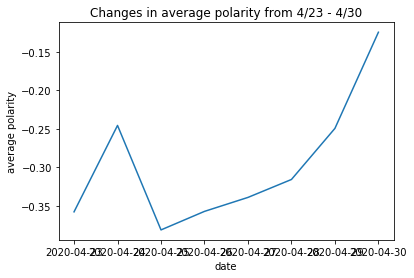

In [57]:
plt.plot(grouped['day'], grouped['polarity'])
plt.title("Changes in average polarity from 4/23 - 4/30")
plt.xlabel("date")
plt.ylabel("average polarity")

/Users/kwoo3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/kwoo3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'fraction')

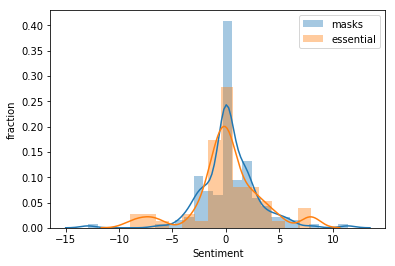

In [60]:
sns.distplot(tweets.loc[tweets['text'].str.contains('masks', na = False)]['polarity'], label = 'masks')
sns.distplot(tweets.loc[tweets['text'].str.contains('essential', na = False)]['polarity'], label = 'essential')
plt.legend()
plt.xlabel('Sentiment')
plt.ylabel('fraction')